## 2021 Winter ECE 143

Airbnb Datasets are created by Airbnb, an online marketplace company that connects people who want to rent out their homes with people who are looking for accommodation in that locale. Airbnb Datasets contain a lot of different csv files during different time periods. They record the price, room type, occupancy rate, host rating, location of room, etc. By analyzing Airbnb Datasets, we can find some relationship between those factors. 




In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

## The trend of price

In [2]:
def string_to_date(file_name):
    month_str_to_int = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 
                        'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 
                        'Sep':9, 'Oct':10,'Nov':11,'Dec':12}
    month = month_str_to_int[file_name[15+9:15+12]]
    day = int(file_name[15+13:15+15])
    year = int(file_name[15+16:15+20])
    return datetime.date(year, month, day)

def find_index(array, dt):
    for i in range(len(array)):
        if dt.__eq__(array[i]):
            return i

In [4]:
listing_data_path = './listing_data'
listing_data_name = []
num_data = 0 # total number of files
date = [] # the datetime variable which restore the date
listing_data = [] # the list contains the pandas variable
date_array = None # The date_array, numpy array, restores the differnece of two dates
room = {'Shared room':0, 'Hotel room':1, 'Entire home/apt':2, 'Private room':3} # room type dict


# Loading all the listing data name
for file in os.listdir(listing_data_path):
    name = listing_data_path + '/' + file
    if len(name) == 39:
        listing_data_name.append(listing_data_path + '/' +  file)


for file_name in listing_data_name:
    data = pd.read_csv(file_name)
    listing_data.append(data)

# Create the time line array for date
for file_name in listing_data_name:
    dt = string_to_date(file_name)
    date.append(dt)
num_data = len(date)
# Bubble Sort
for i in range(num_data):
    for j in reversed(range(i, num_data)):
        if date[i].__ge__(date[j]):
            date[i], date[j] = date[j], date[i]
date_array = np.zeros((len(date)))

# Calculate the difference days between two dates:
for i in range(num_data):
    if i == 0:
        continue
    date_array[i] = (date[i].__sub__(date[i-1])).days + date_array[i-1]
price_array = np.zeros((num_data, 5))
cnt_array = np.zeros((num_data, 5))

    
# Loop for all data
for fname in listing_data_name:
    data = pd.read_csv(fname)
    dt = string_to_date(fname)
    index = find_index(date, dt)
    num = len(data)
    for i in range(num):
        price_array[index][room[data['room_type'][i]]] += data['price'][i]
        cnt_array[index][room[data['room_type'][i]]] += 1
        price_array[index][4] += data['price'][i]
        cnt_array[index][4] += 1
    for i in range(5):
        if cnt_array[index][i] == 0:
            continue
        price_array[index][i] /= cnt_array[index][i]

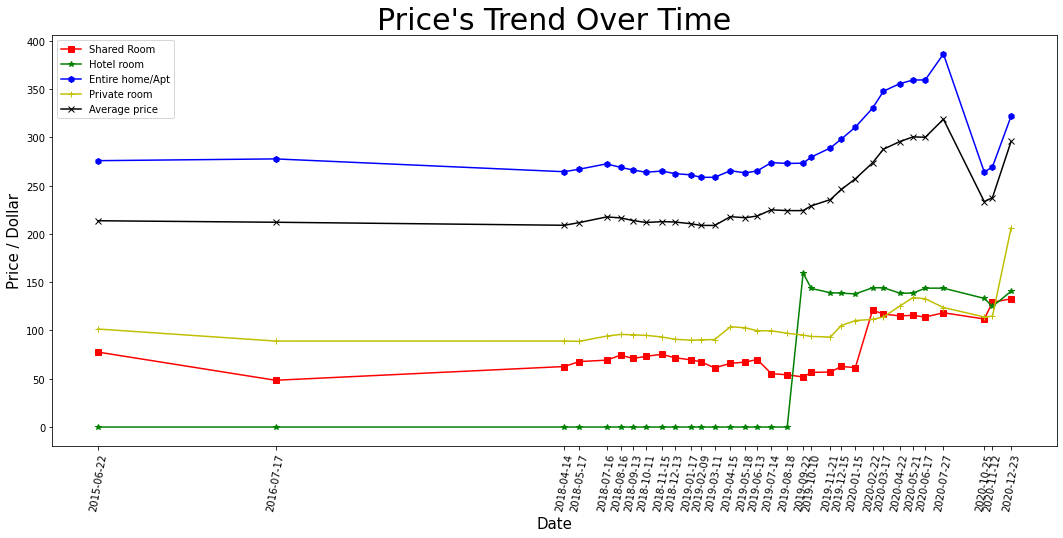

In [5]:
# Plot the line plot for price changing:
plt.figure(figsize=(18,15)) # 18,10
plt.title('Price\'s Trend Over Time', fontsize=30)
plt.xlabel('Date', fontsize = 15)  
plt.ylabel('Price / Dollar', fontsize = 15)  
plt.xticks(date_array, date, rotation=80)
plt.plot(date_array, price_array[:,0], c='red', marker='s',label='Shared Room')
plt.plot(date_array, price_array[:,1], c='g', marker='*',label='Hotel room')
plt.plot(date_array, price_array[:,2], c='b', marker='h',label='Entire home/Apt')
plt.plot(date_array, price_array[:,3], c='y', marker='+',label='Private room')
plt.plot(date_array, price_array[:,4], c='k', marker='x',label='Average price')
plt.subplots_adjust(bottom=0.5)
plt.legend()
plt.show()

From the previous plot, we can make the following conclusion:
1. All types of rooms, the average price was slowly increasing from 2015 to 2020 Jul and decreased greatly from 2020 Jul to 2020 Oct, which may due to the covid-19. After that, the average price was slowly increasing.
2. The hotel room did not show up until 2019 Aug.
3. The order of average prices should be : Entire home/apt > Private room > Hotel room > Shared Room

## Trend of the Average availability\_365

In [6]:
# Loop for all data
avail_array = np.zeros((num_data, 5))
cnt_array = np.zeros((num_data, 5))

for fname in listing_data_name:
    data = pd.read_csv(fname)
    dt = string_to_date(fname)
    index = find_index(date, dt)
    num = len(data)
    for i in range(num):
        avail_array[index][room[data['room_type'][i]]] += data['availability_365'][i]
        cnt_array[index][room[data['room_type'][i]]] += 1
        avail_array[index][4] += data['availability_365'][i]
        cnt_array[index][4] += 1
    for i in range(5):
        if cnt_array[index][i] == 0:
            continue
        avail_array[index][i] /= cnt_array[index][i]

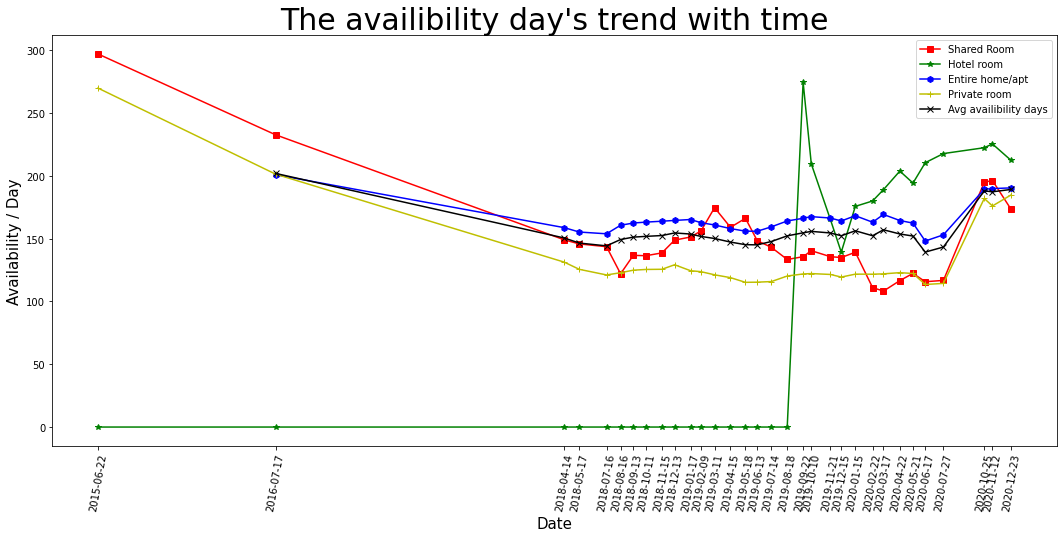

In [7]:
# Plot the line plot for price changing:
plt.figure(figsize=(18,15))
plt.title('The availibility day\'s trend with time', fontsize=30)
plt.xlabel('Date', fontsize=15)  
plt.ylabel('Availability / Day', fontsize = 15)  
plt.xticks(date_array, date, rotation=80)
plt.plot(date_array, avail_array[:,0], c='red', marker='s',label='Shared Room')
plt.plot(date_array, avail_array[:,1], c='g', marker='*',label='Hotel room')
plt.plot(date_array, avail_array[:,2], c='b', marker='h',label='Entire home/apt')
plt.plot(date_array, avail_array[:,3], c='y', marker='+',label='Private room')
plt.plot(date_array, avail_array[:,4], c='k', marker='x',label='Avg availibility days')
plt.subplots_adjust(bottom=0.5)
plt.legend()
plt.show()



From the previous plot, we can make the conclusion that:
1. The overal average availibility days among all room types are decreasing from 2015 to 2020 Jul, but slightly increasing from 2020 Jul til 2020 Dec
2. The Hotel room showed up at the beginning of 2019, and has the highest average availibility days
3. After 2020 Jul, all types rooms' availibility days were increasing.

In [10]:
listing_data[0].head(1)

id                                            name  host_id host_name  \
0   6  Large Craftsmen w/ yard ~ Perfect for families       29      Sara   

   neighbourhood_group neighbourhood   latitude   longitude        room_type  \
0                  NaN   North Hills  32.753993 -117.129705  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    295               1                137  2018-04-01               1.15   

   calculated_host_listings_count  availability_365  
0                               1                13

In [11]:
# Loop for all data
minimum_night_array = np.zeros((num_data, 5))
cnt_array = np.zeros((num_data, 5))

for fname in listing_data_name:
    data = pd.read_csv(fname)
    dt = string_to_date(fname)
    index = find_index(date, dt)
    num = len(data)
    for i in range(num):
        minimum_night_array[index][room[data['room_type'][i]]] += data['minimum_nights'][i]
        cnt_array[index][room[data['room_type'][i]]] += 1
        minimum_night_array[index][4] += data['minimum_nights'][i]
        cnt_array[index][4] += 1
    for i in range(5):
        if cnt_array[index][i] == 0:
            continue
        minimum_night_array[index][i] /= cnt_array[index][i]

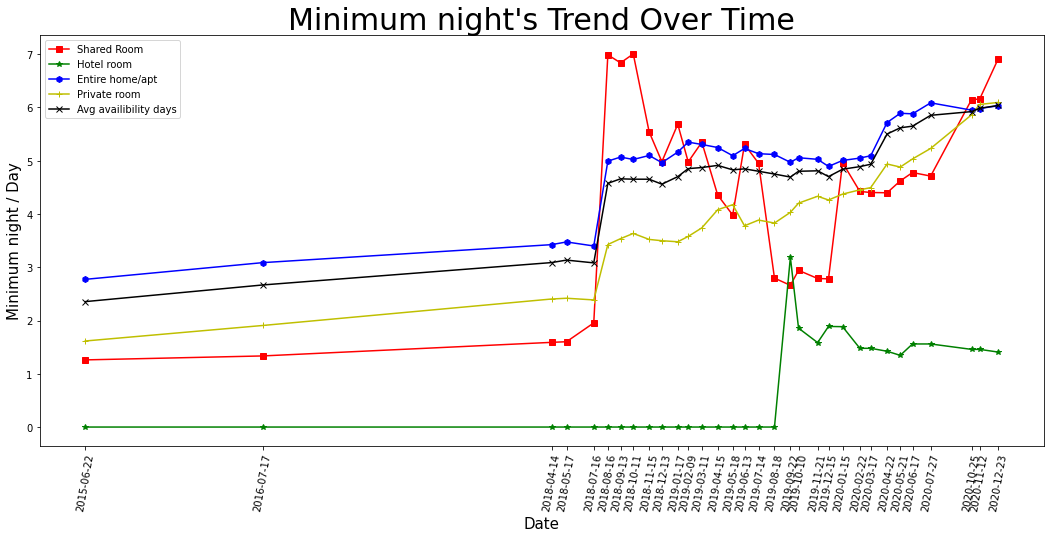

In [25]:
# Plot the line plot for price changing:
plt.figure(figsize=(18,15))
plt.title('Minimum night\'s Trend Over Time', fontsize=30)
plt.xlabel('Date', fontsize=15)  
plt.ylabel('Minimum night / Day',fontsize=15)  
plt.xticks(date_array, date, rotation=80)
plt.plot(date_array, minimum_night_array[:,0], c='red', marker='s',label='Shared Room')
plt.plot(date_array, minimum_night_array[:,1], c='g', marker='*',label='Hotel room')
plt.plot(date_array, minimum_night_array[:,2], c='b', marker='h',label='Entire home/apt')
plt.plot(date_array, minimum_night_array[:,3], c='y', marker='+',label='Private room')
plt.plot(date_array, minimum_night_array[:,4], c='k', marker='x',label='Avg availibility days')
plt.subplots_adjust(bottom=0.5)
plt.legend()
plt.show()



### Analysis of relationship between price and room type

Xibo Zhang

In [12]:
map_data_path = './listing_data/listings_Dec_23_2020.csv'
map_data = pd.read_csv(map_data_path)
print(map_data['latitude'].min(), map_data['latitude'].max(), map_data['longitude'].min(), map_data['longitude'].max())

32.54107 33.08582 -117.28143 -116.93571000000001


## The heatmap plot for locations

In [14]:
import folium
import pandas as pd
from folium.plugins import HeatMap
# define the world map
world_map = folium.Map()

# display world map
#world_map
# San Francisco latitude and longitude values
latitude = 32.72
longitude = -117.16

# Create map and display it


# Display the map of San Francisco
#san_map
# Create map and display it
#san_map = folium.Map(location=[latitude, longitude], zoom_start=12,tiles='Stamen Toner')
#cdata = pd.read_csv('https://cocl.us/sanfran_crime_dataset')

# get the first 200 crimes in the cdata
limit = 10000
data = map_data.iloc[0:limit, :]

# Instantiate a feature group for the incidents in the dataframe
#incidents = folium.map.FeatureGroup()

# Loop through the 200 crimes and add each to the incidents feature group
'''for lat, lng, in zip(data['latitude'], data['longitude']):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )'''

# Add incidents to map
san_map = folium.Map(location=[latitude, longitude], zoom_start=10)
HeatMap(data[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(san_map)
san_map

In [15]:
token = 'pk.eyJ1IjoiNzM2ODkxNDEwIiwiYSI6ImNrbDY4MnlvZzBibGMyd283OGprYWFuM3UifQ.MqFaTEXVYsnkkwFhxwEkmQ'

In [16]:
import plotly.graph_objects as go
import plotly.express as px

## Part 3

In [17]:
fig = go.Figure(go.Scattermapbox(mode='markers',
                                lon = data.longitude,
                                lat = data.latitude,
                                hovertext = data.id))
fig.update_layout(mapbox={'accesstoken' : token, 'center' : {'lon' : -117.063, 'lat': 32.765}, 'zoom':10.0},
                 margin = {'l' : 0, 'r' : 0, 't' : 0, 'b' : 0})

## Part 4: The map plot for price

In [18]:
price_data = data[data.price < 1000]
fig = px.scatter_mapbox(price_data,
                       lon = 'longitude',
                       lat = 'latitude',
                       color = 'price',
                        title = 'price map',
                        hover_name = 'id',
                        color_continuous_scale = px.colors.carto.Temps
                       )
fig.update_layout(mapbox={'accesstoken' : token, 'center' : {'lon' : -117.063, 'lat': 32.765}, 'zoom':10.0},
                 margin = {'l' : 0, 'r' : 0, 't' : 0, 'b' : 0})

## Part 5: The map plot for avaiability days

In [20]:
available_data = data
fig = px.scatter_mapbox(available_data,
                       lon = 'longitude',
                       lat = 'latitude',
                       color = 'availability_365',
                        title = 'availability_365 map',
                        hover_name = 'id',
                        color_continuous_scale = px.colors.carto.Temps
                       )
fig.update_layout(mapbox={'accesstoken' : token, 'center' : {'lon' : -117.063, 'lat': 32.765}, 'zoom':10.0},
                 margin = {'l' : 0, 'r' : 0, 't' : 0, 'b' : 0})

## Part 6: The map plot for minimum nights

In [21]:
minimum_nights_data = data
fig = px.scatter_mapbox(minimum_nights_data,
                       lon = 'longitude',
                       lat = 'latitude',
                       color = 'minimum_nights',
                        title = 'availability_365 map',
                        hover_name = 'id',
                        color_continuous_scale = px.colors.carto.Temps
                       )
fig.update_layout(mapbox={'accesstoken' : token, 'center' : {'lon' : -117.063, 'lat': 32.765}, 'zoom':10.0},
                 margin = {'l' : 0, 'r' : 0, 't' : 0, 'b' : 0})

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

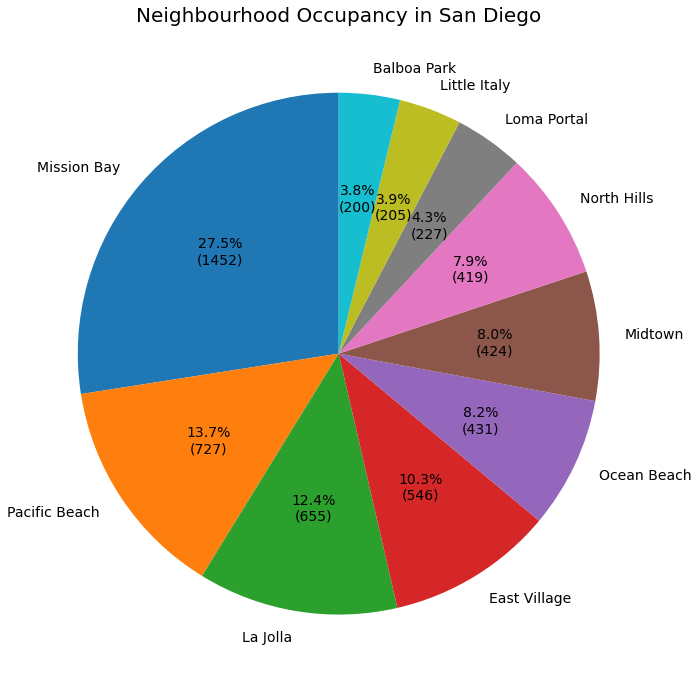

In [57]:
labels = data.neighbourhood.value_counts().index[0:10]
#colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
#explode = (0.1,0,0,0,0)
shape = data.neighbourhood.value_counts().values[0:10]
# Function to lable percentage and number of listings for
# the given neighbourhood
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:1.1f}%\n({:d})".format(pct, absolute)
plt.figure(figsize=(12,12))

# Visualize the pie chart
#plt.pie(shape, explode = None, labels=labels, colors= None, autopct = '%1.1f%%', startangle=90)
plt.pie(shape, explode = None, labels=labels, colors= None, autopct = lambda pct: func(pct, shape), startangle=90)
#plt.legend(labels)
# Add title and increase the fonts
plt.title('Neighbourhood Occupancy in San Diego', fontsize= 20)
plt.rcParams['font.size'] = 14
plt.show()

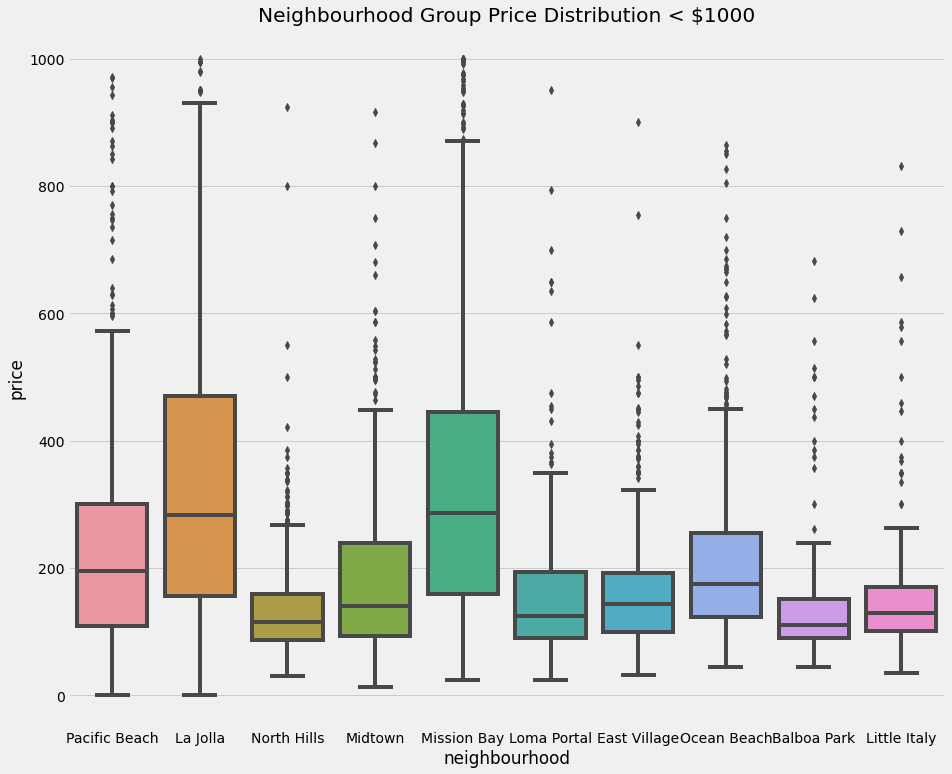

In [63]:
#Plot Price Distribution on top 10 region area
#Only use the data whose price is less than 1000
labels = data.neighbourhood.value_counts().index[0:10]
ten_top_neighbourhood = price_data.loc[data['neighbourhood'].isin(labels)]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,12))
sns.boxplot(y='price',x='neighbourhood',data = ten_top_neighbourhood)
plt.title('Neighbourhood Group Price Distribution < $1000')
plt.show()


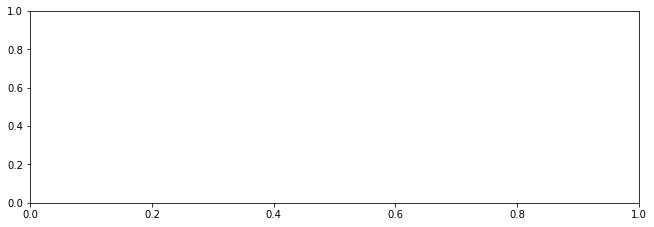

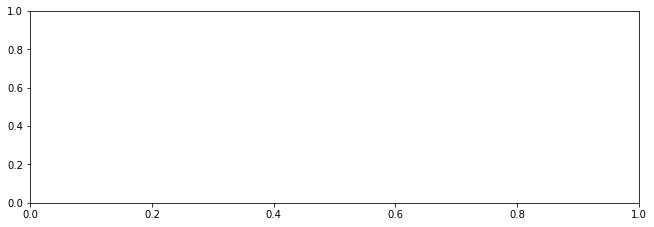

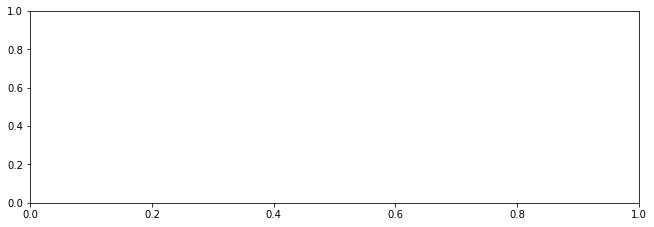

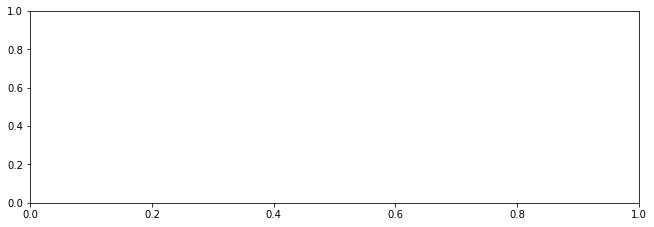

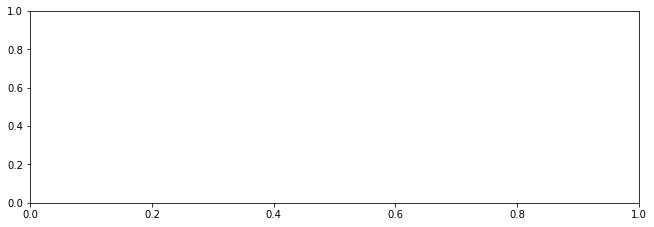

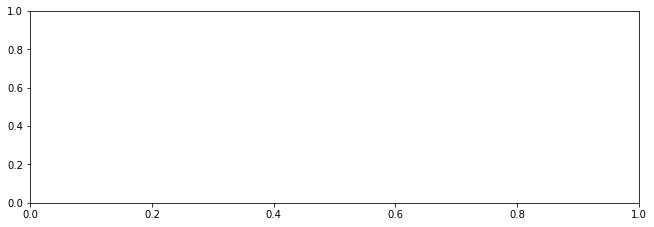

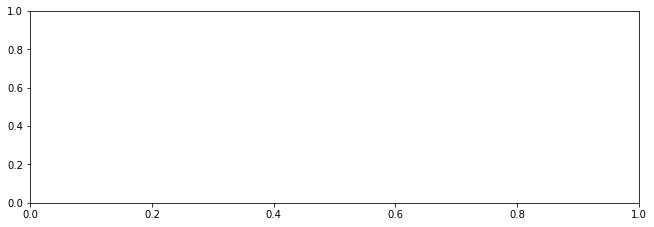

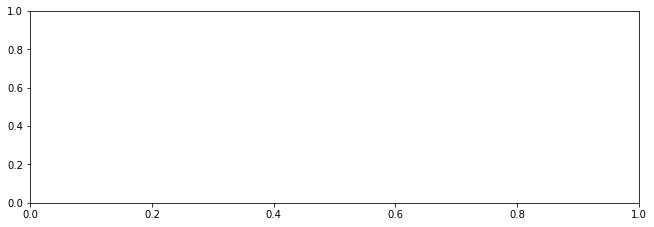

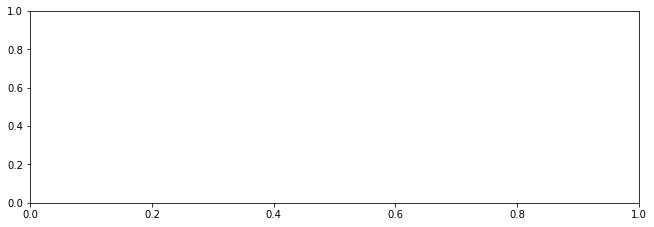

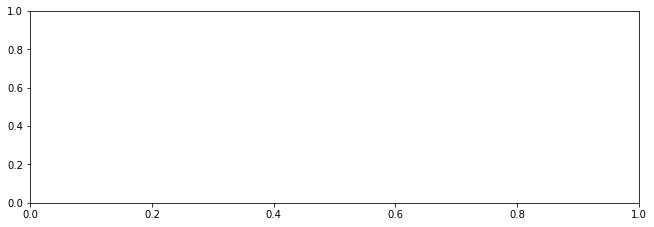

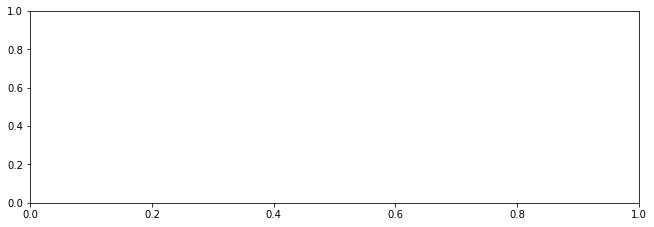

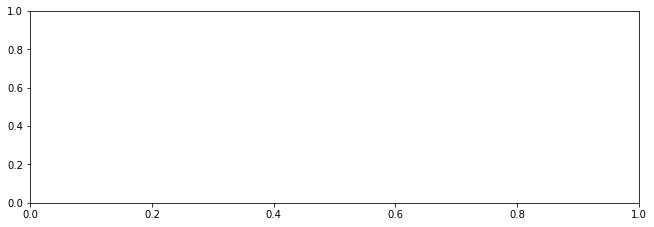

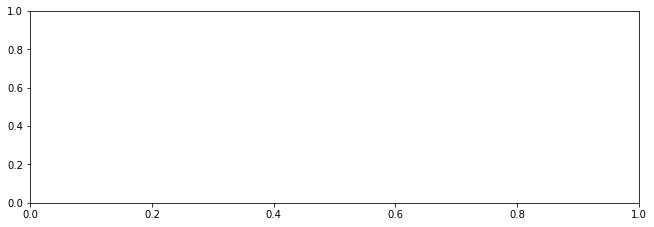

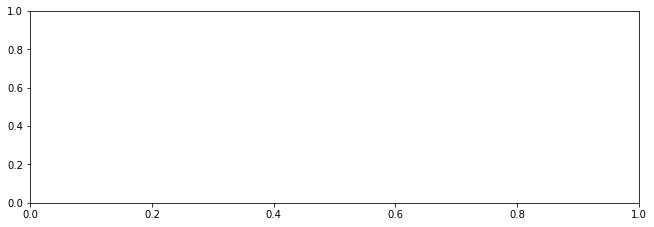

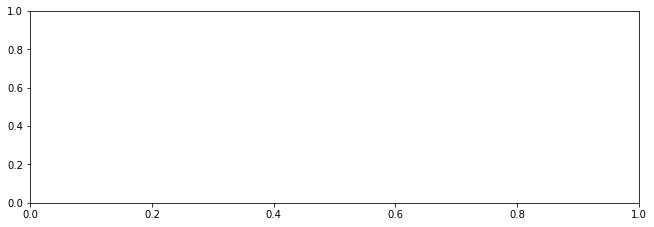

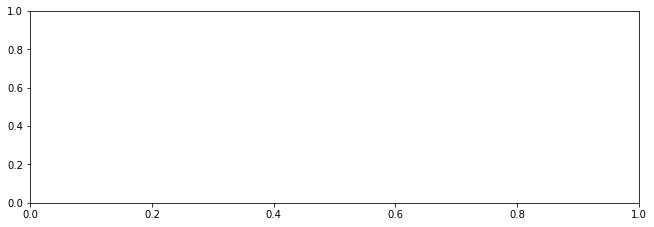

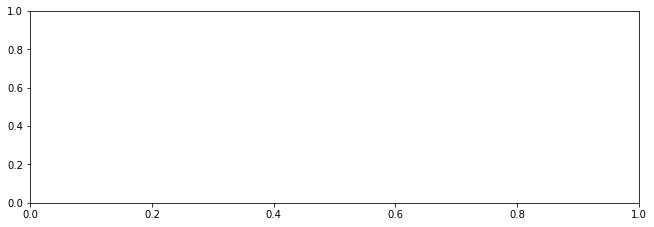

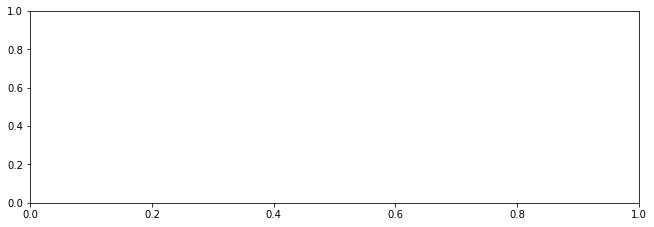

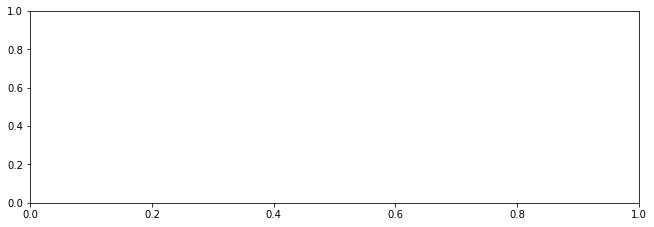

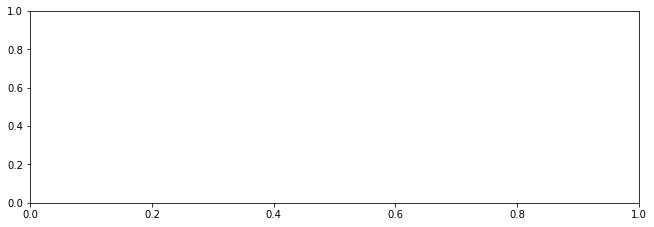

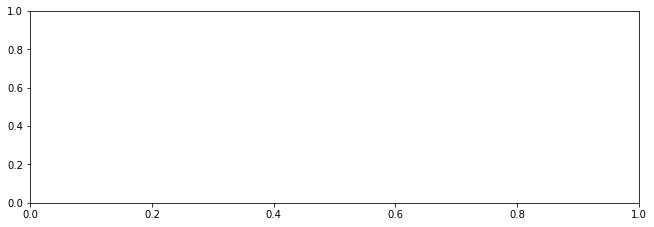

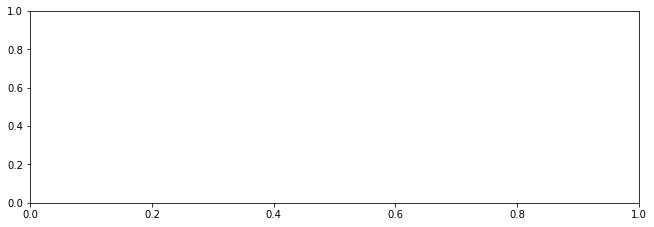

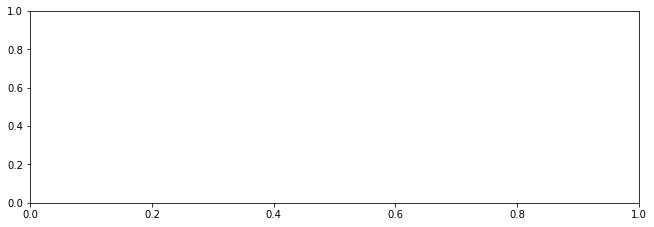

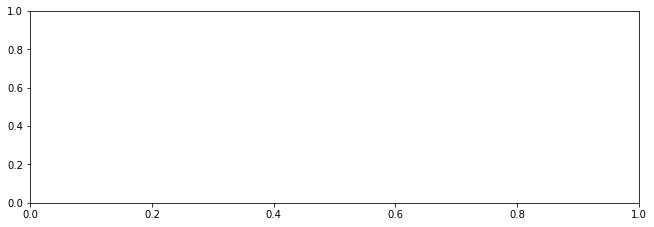

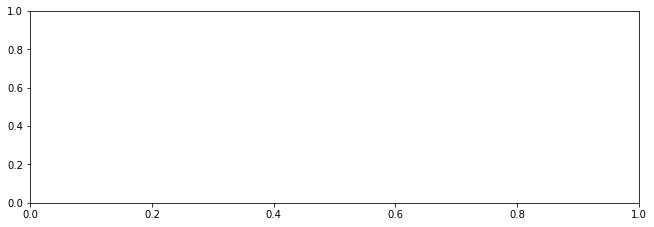

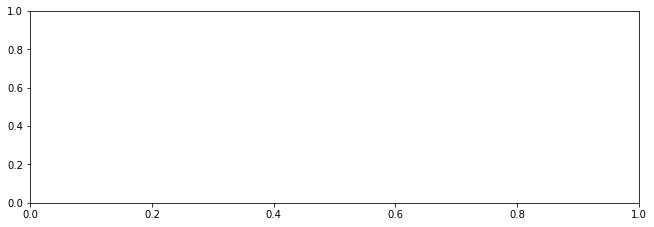

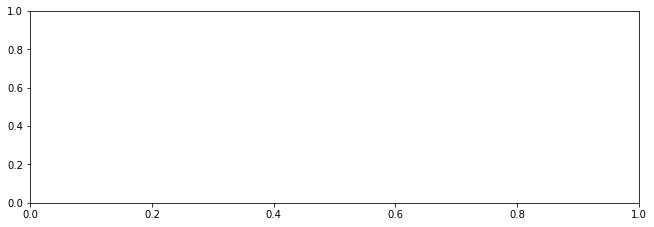

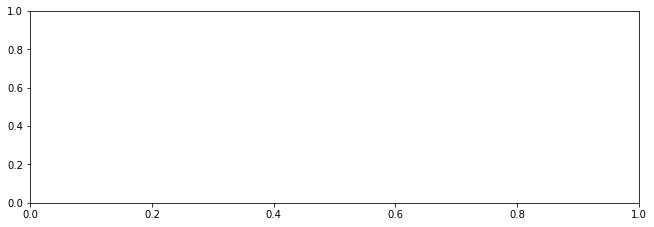

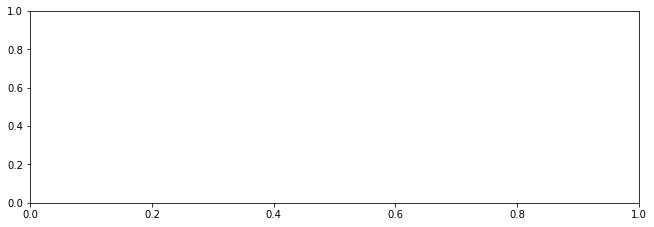

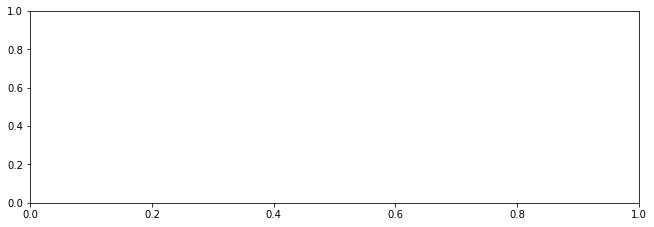

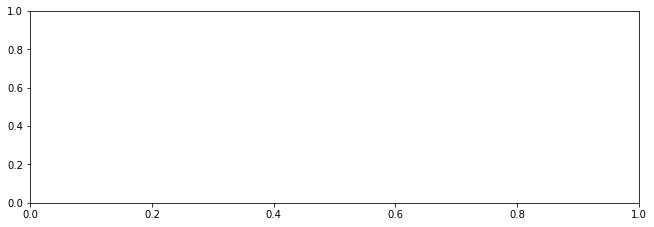

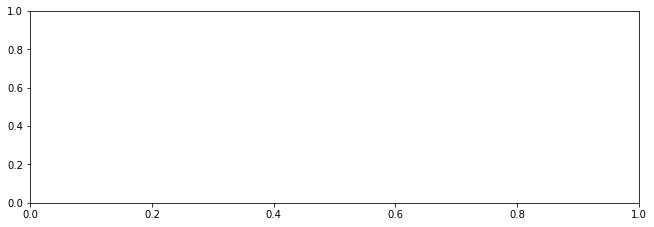

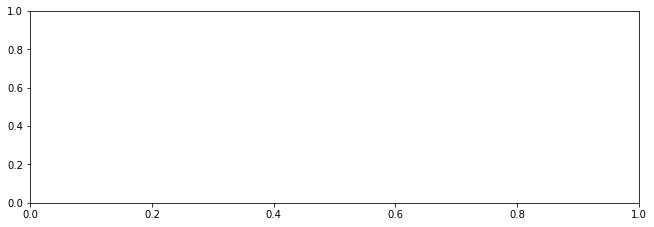

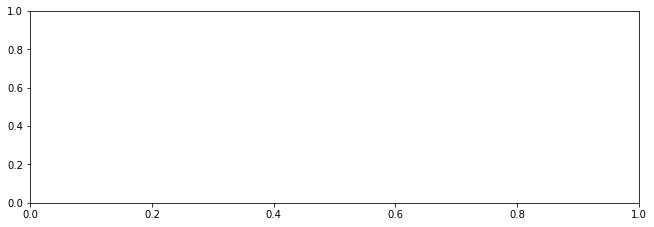

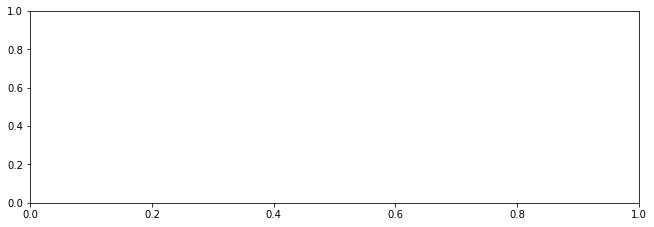

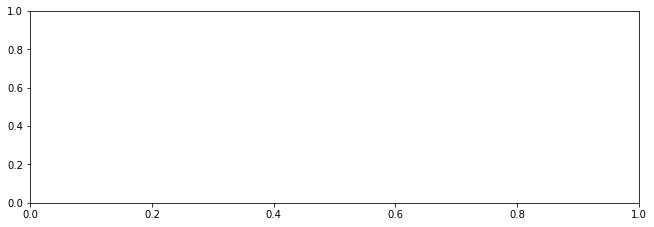

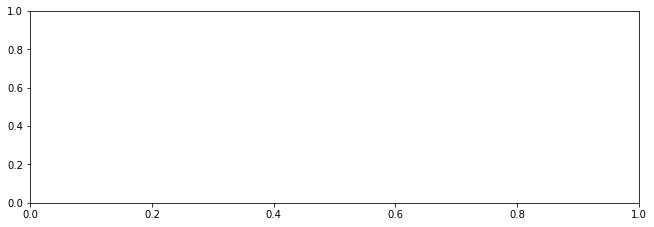

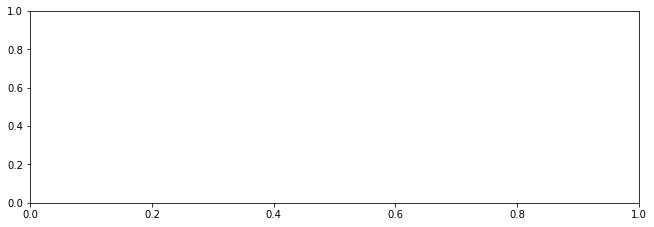

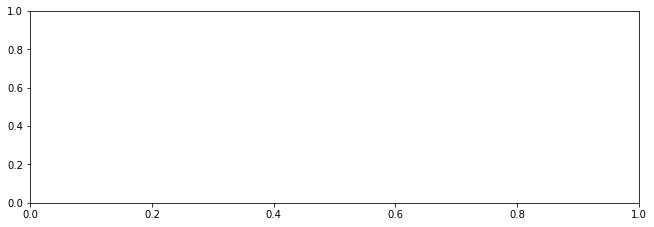

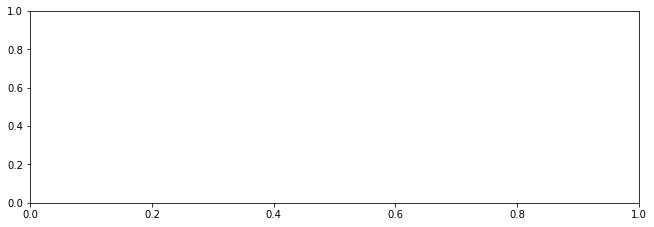

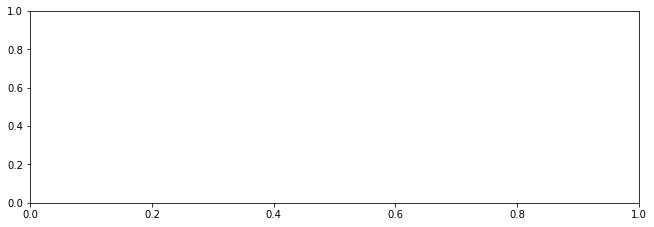

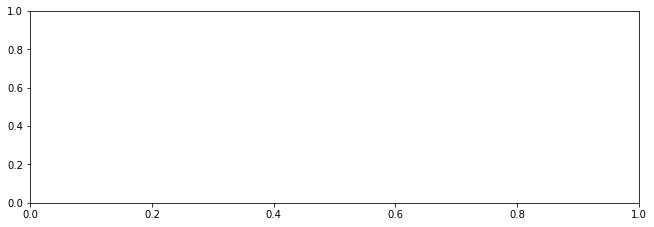

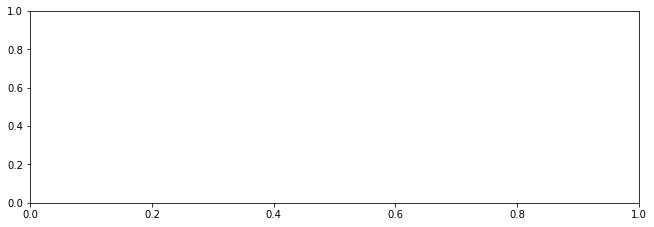

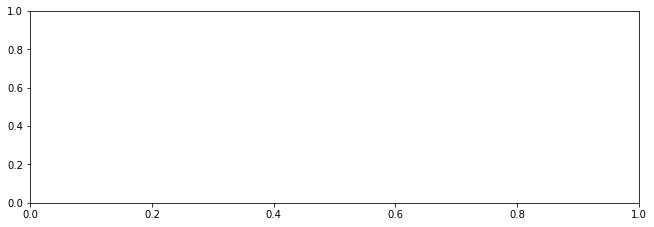

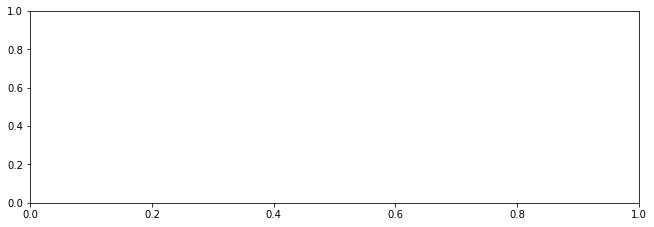

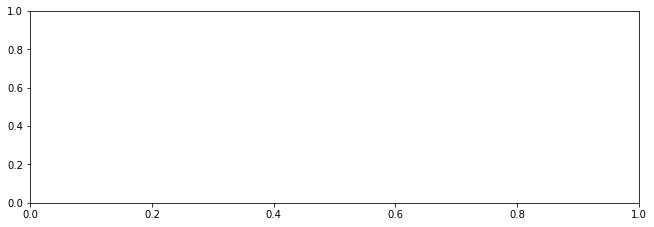

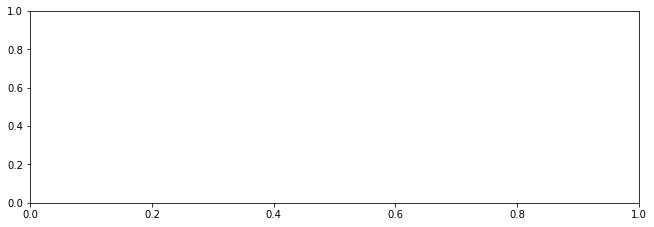

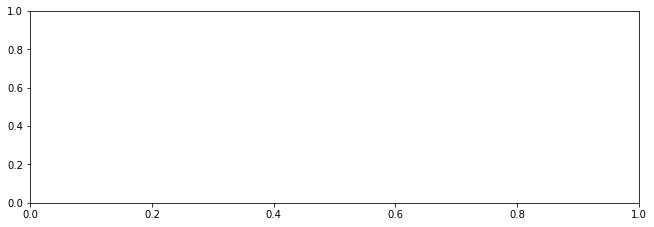

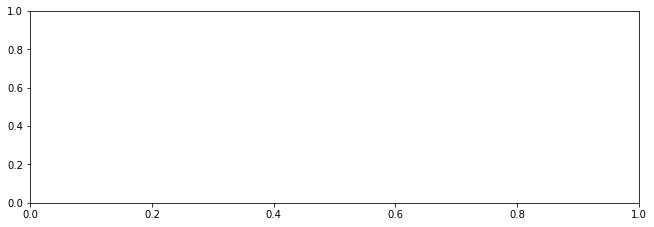

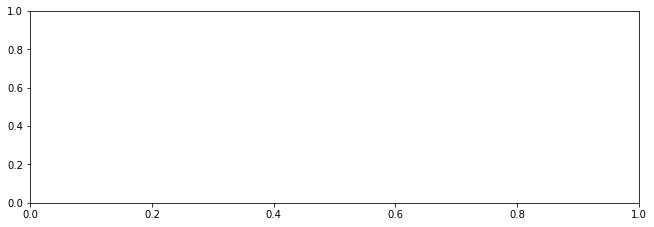

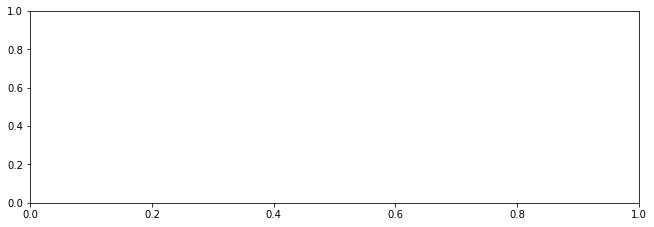

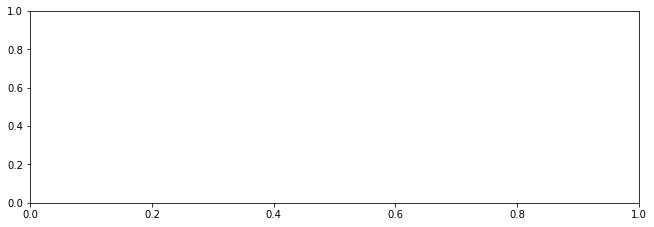

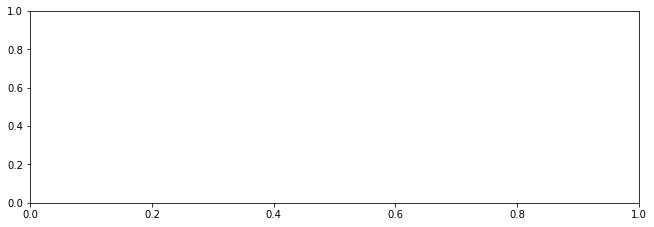

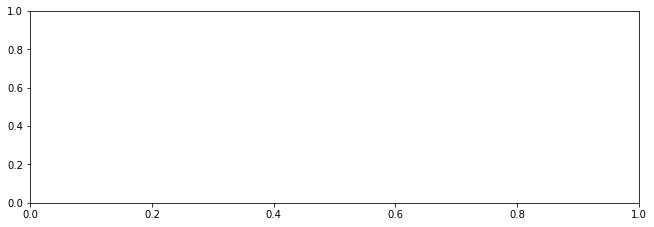

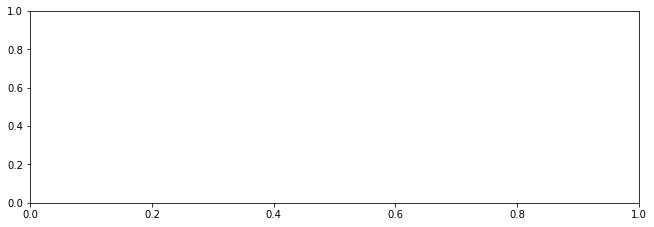

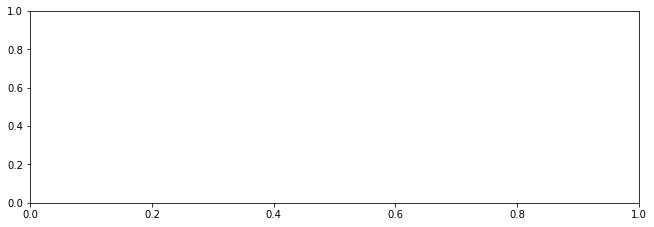

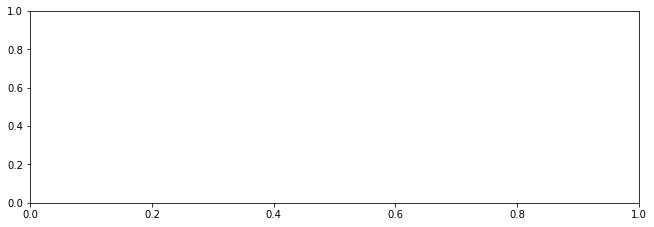

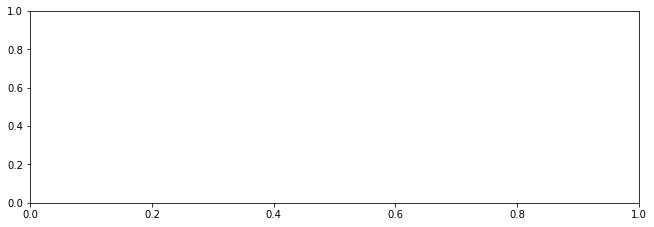

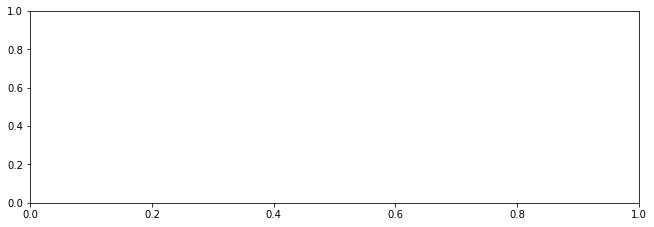

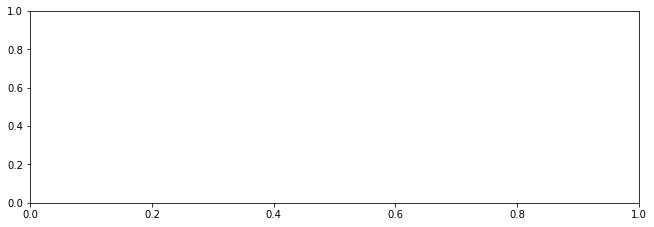

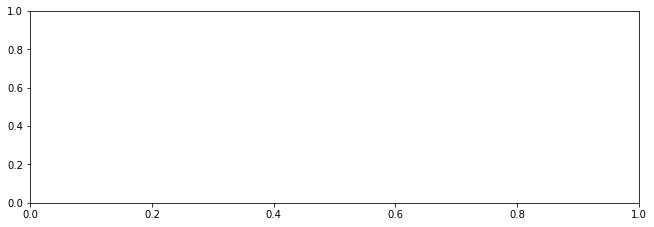

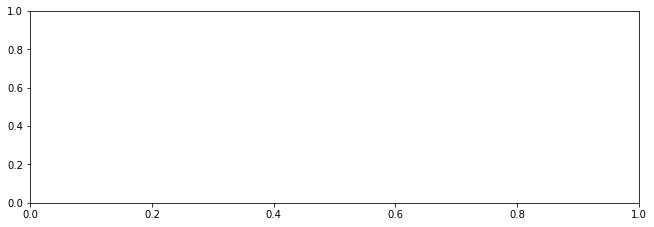

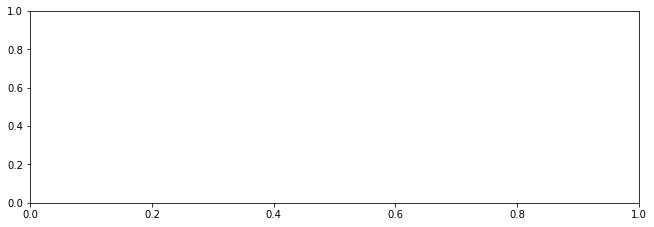

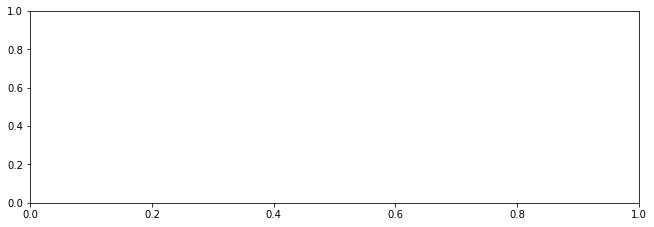

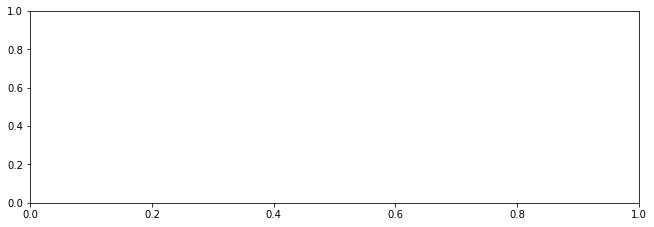

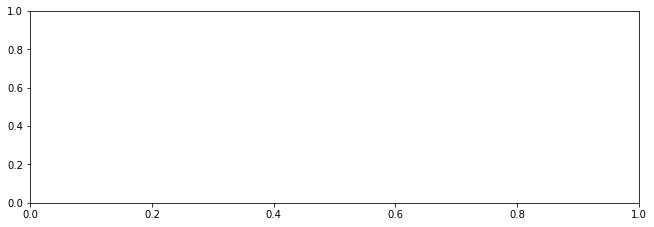

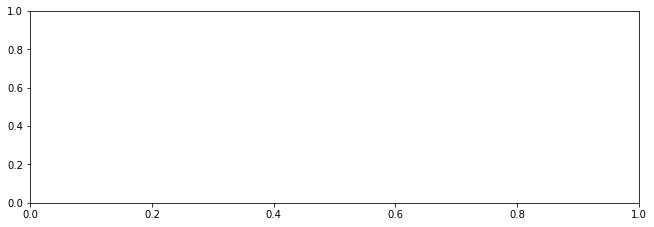

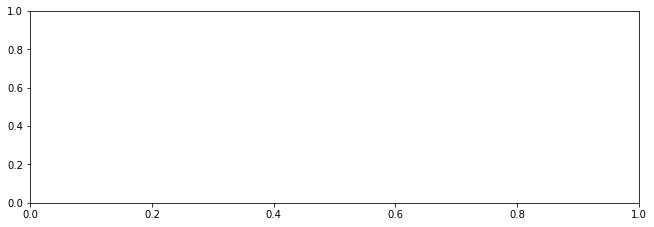

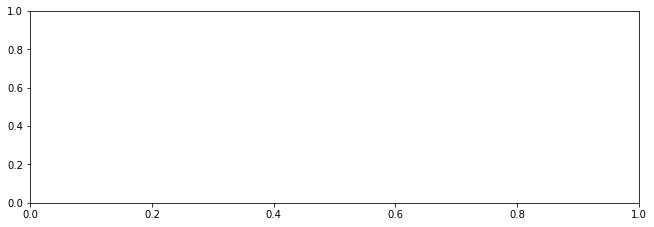

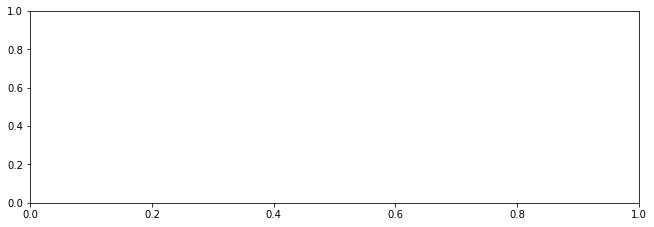

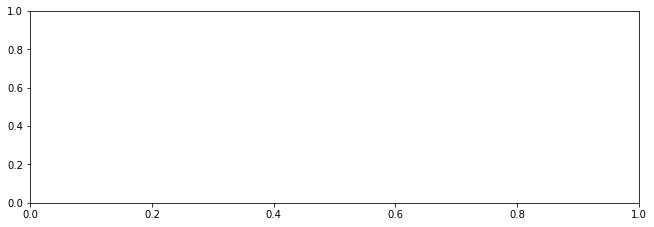

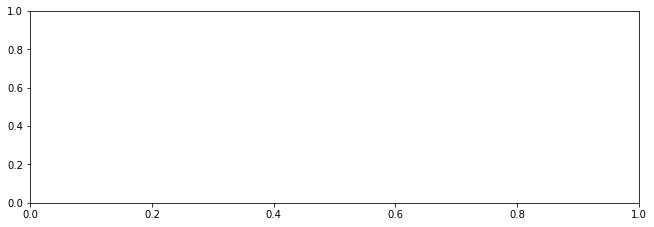

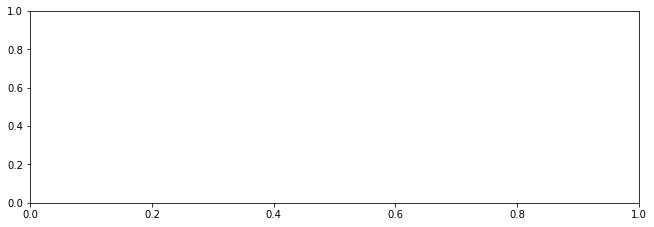

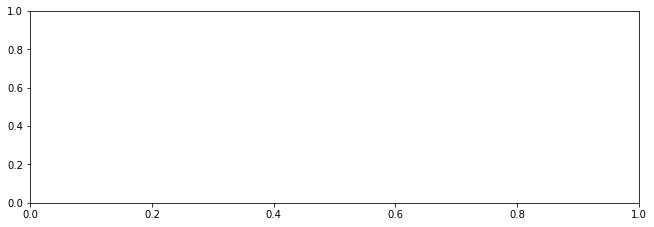

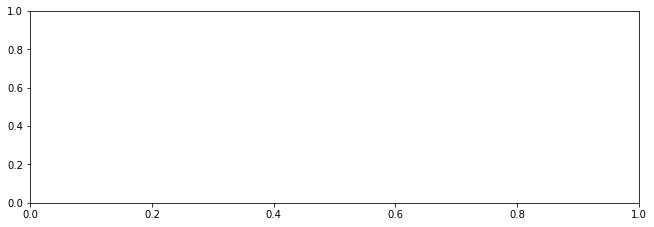

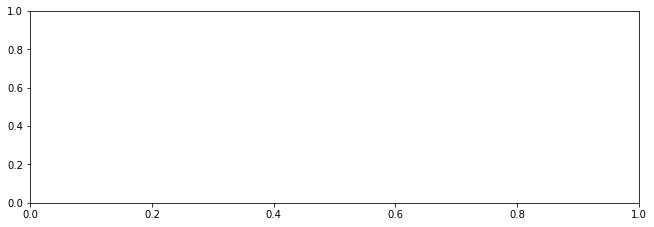

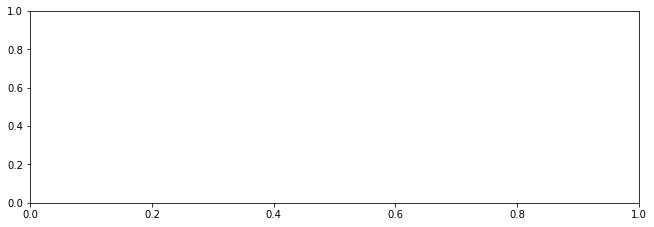

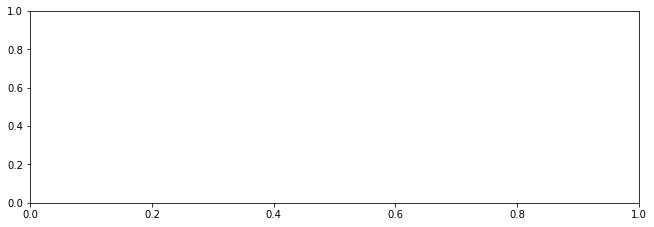

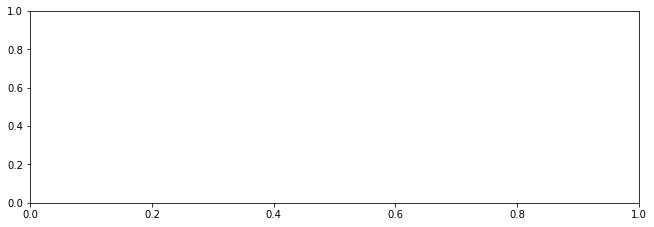

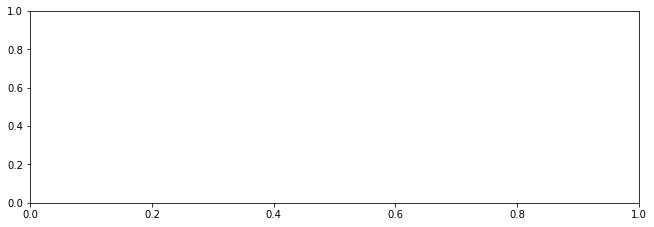

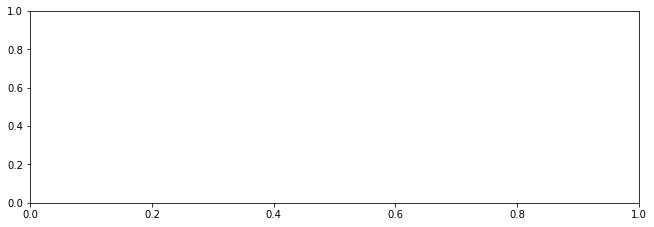

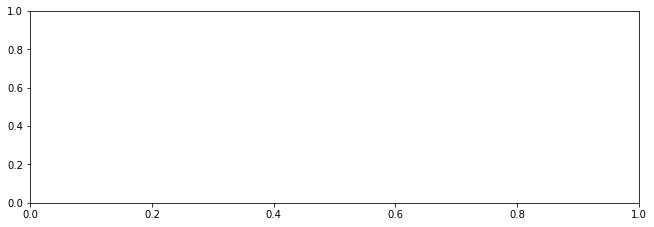

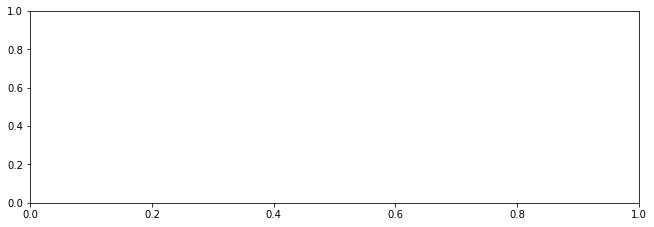

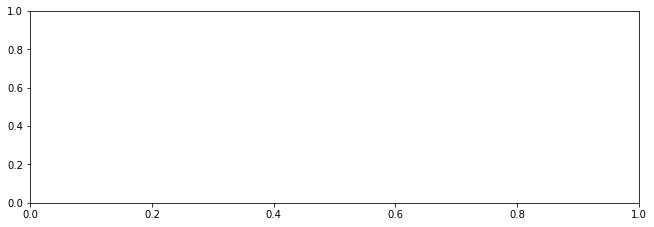

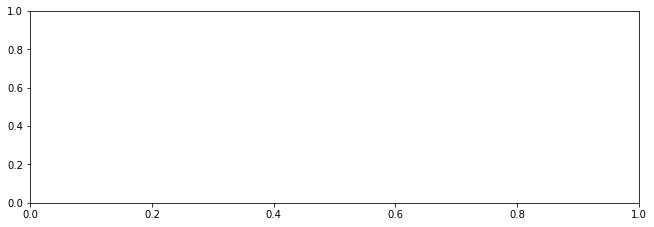

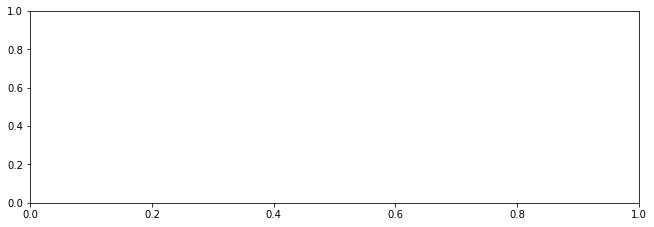

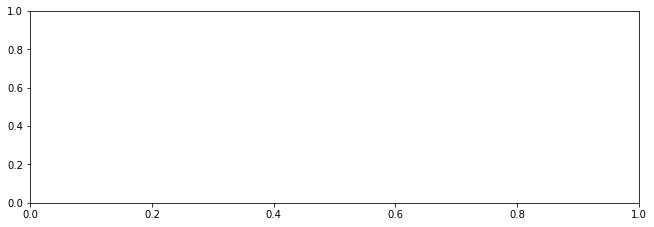

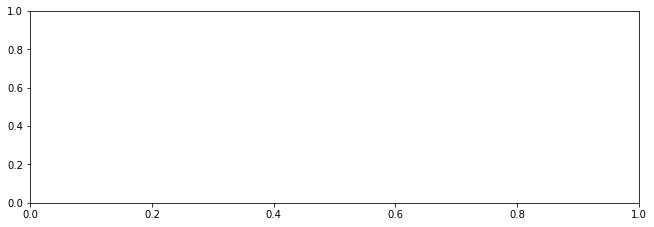

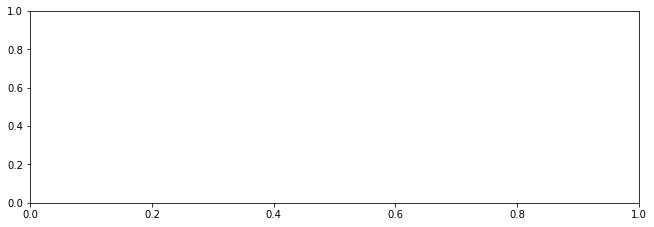

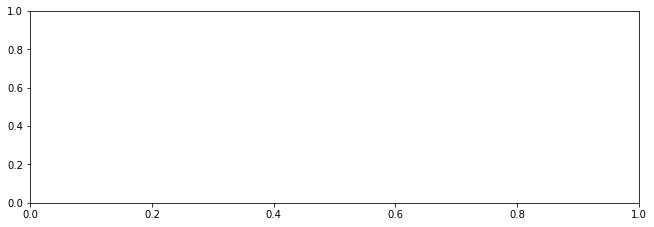

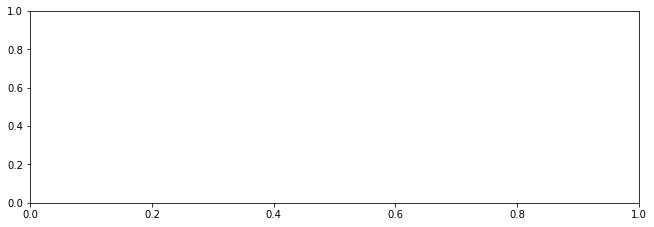

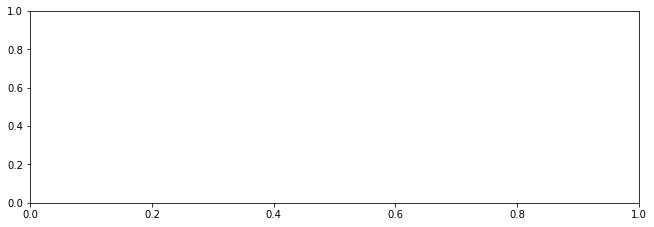

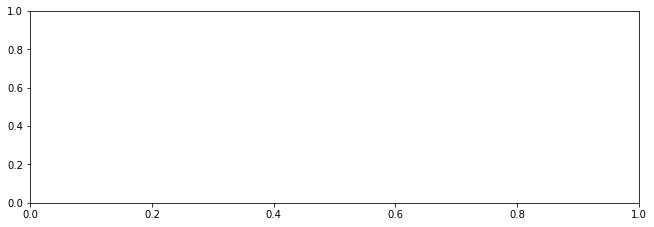

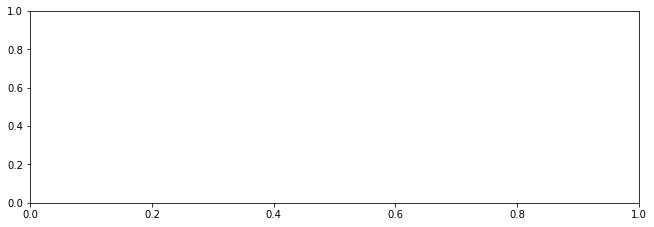

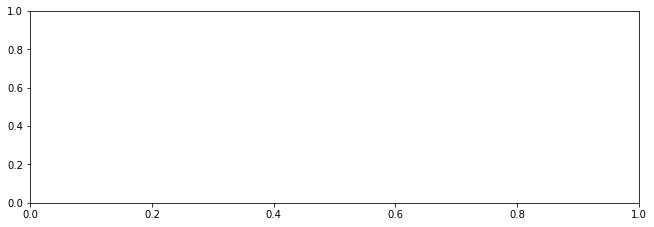

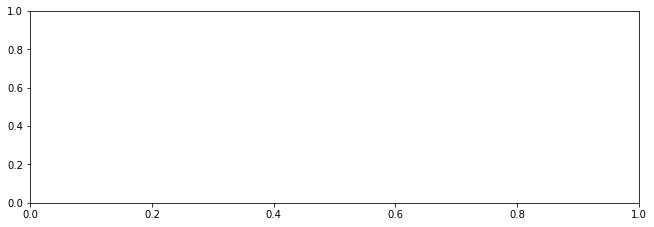

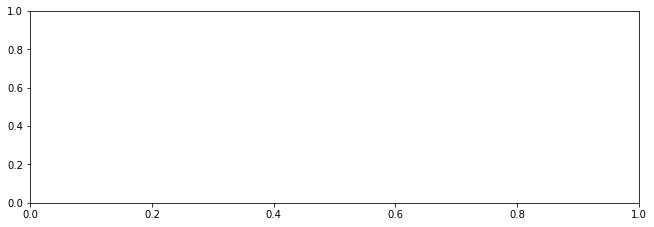

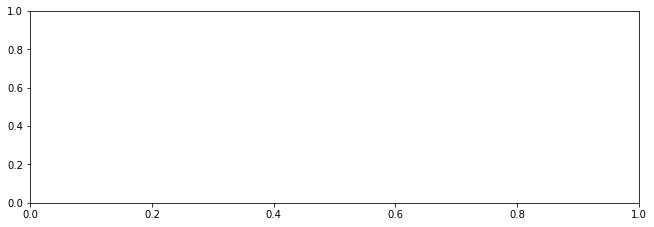

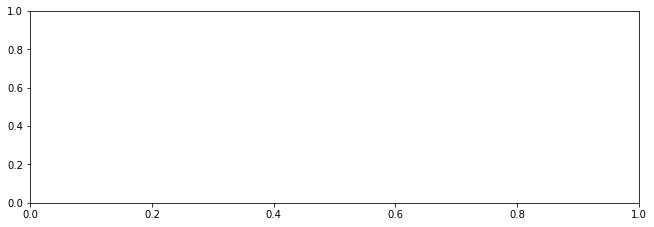

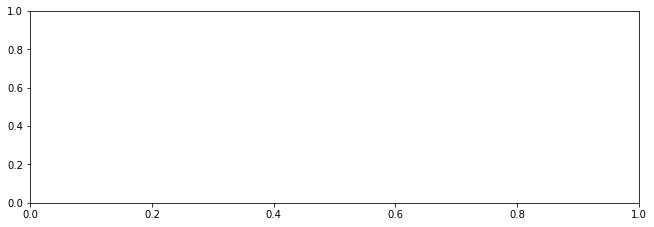

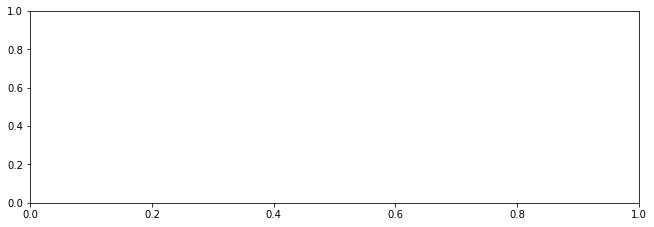

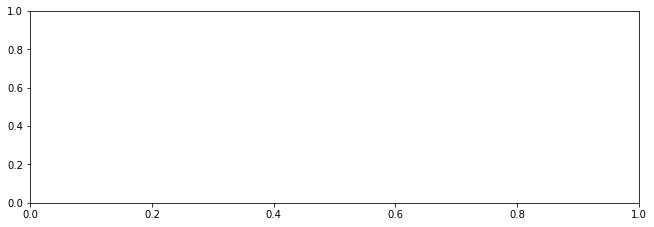

In [30]:
import plotly.offline as pyo
import plotly.graph_objs as go
#Plot room type proportion on all region area

#set color
colors = ['#16478E', '#0083BF', '#32C3EB', '#97D9EA']
room_types=data.groupby(['neighbourhood', 'room_type']).size()
for region in data.neighbourhood.unique():
    
    plt.figure(figsize=(24,12))
    neighbourhood_types = room_types[region]
    labels = neighbourhood_types.index
    sizes = neighbourhood_types.values
    plot_num = 321
    plt.subplot(plot_num)
    neighbourhood_fig = go.Figure(data = [go.Pie(labels = labels, values = sizes, hole = 0.6)])
    neighbourhood_fig.update_traces(title = region, marker=dict(colors=colors))
    neighbourhood_fig.show()
    
    plot_num += 1